Chapter 16

# 不同SVD类型
Book_4《矩阵力量》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

该代码实现了对矩阵的奇异值分解（SVD）及其在重构和误差分析中的应用，主要分为以下几个步骤：

1. **导入必要的库**：代码使用了 `NumPy` 进行数值计算，`Matplotlib` 和 `Seaborn` 进行可视化展示。设置的精度为小数点后三位。

2. **SVD分解**：通过函数`svd(X, full_matrices)`对输入矩阵$X$进行奇异值分解，计算得到三个矩阵：
   - $U$: 左奇异矩阵，其中每一列代表一个特征向量；
   - $S$: 奇异值矩阵，是一个对角矩阵，其对角线上的元素$s_i$为非负值，按降序排列；
   - $V^T$: 右奇异矩阵的转置。  
   公式为：$$X = U S V^T$$。根据`full_matrices`的设置，决定是否返回完整矩阵。

3. **生成随机矩阵**：生成一个6行4列的随机矩阵$X$，并调整其秩，以便后续的SVD分析。具体操作是将第4列设置为第1列和第2列之和。

4. **可视化分解结果**：通过热力图展示原始矩阵$X$、左奇异矩阵$U$、奇异值矩阵$S$以及右奇异矩阵$V^T$。这部分帮助理解SVD分解后矩阵的结构及数值分布。

5. **紧致形式SVD分解**：使用紧致形式进行SVD分解，减少内存使用并提升计算效率，继续可视化分解结果。

6. **压缩形式分析**：将原矩阵调整为秩为3的矩阵，并再次进行SVD分解与可视化，展示不同秩对矩阵结构的影响。

7. **截断重构与误差分析**：截断奇异值分解，保留前2个奇异值进行重构，得到近似矩阵$\hat{X}$。使用公式：$$\hat{X} = U_{truc} S_{truc} V_{truc}^T$$，并可视化重构后的矩阵与原始矩阵之间的误差$E = X - \hat{X}$，通过热力图展示重构效果与残差。

8. **奇异值的张量积**：计算各个奇异值对应的外积，得到矩阵的各个组成部分，如$$u_1 v_1^T$$，并进行可视化。这些组成部分展示了如何通过奇异值及其对应的特征向量重构原始矩阵。

9. **整体分析**：将所有重构分量的和进行可视化，分析各个部分对原始矩阵的贡献，并计算其重构误差，进一步理解奇异值分解的有效性。

通过这些步骤，该代码为分析和理解矩阵的奇异值分解提供了直观的可视化工具，帮助研究人员和工程师有效地处理和重构数据。

## 导入必要的库

In [1]:
import numpy as np  # 导入NumPy库，用于数值计算
from matplotlib import pyplot as plt  # 导入Matplotlib库用于绘图
import seaborn as sns  # 导入Seaborn库，用于增强图形展示效果
PRECISION = 3  # 设置显示精度为小数点后三位

## 定义SVD分解函数

In [2]:
def svd(X, full_matrices):  # 定义函数svd，用于计算SVD分解
    """
    执行矩阵X的奇异值分解（SVD）。
    参数：
    - X: 输入矩阵
    - full_matrices: 布尔值，指定是否使用完整矩阵
    返回：
    - U: 舍入后的U矩阵
    - S: 舍入后的奇异值矩阵
    - Vt: 转置的V矩阵
    """
    U, s, Vt = np.linalg.svd(X, full_matrices=full_matrices)  # 计算X的SVD分解

    if full_matrices:  # 判断是否使用完整矩阵
        S = np.zeros(X.shape)  # 创建与X形状相同的零矩阵
        np.fill_diagonal(S, s)  # 将奇异值填入S的对角线
    else:
        S = np.diag(s)  # 如果不是完整矩阵，直接生成对角矩阵S

    return np.round(U, PRECISION), np.round(S, PRECISION), np.round(Vt.T, PRECISION)  # 返回舍入后的U、S和转置的V矩阵

## 生成随机矩阵

In [3]:
np.random.seed(1)  # 设置随机数种子，确保结果可重复
X = np.random.randn(6, 4)  # 生成6行4列的随机矩阵X

## 设置可视化参数

In [4]:
all_max = 2  # 热力图显示的最大值
all_min = -2  # 热力图显示的最小值

## 完整SVD分解并可视化结果

In [5]:
U, S, V = svd(X, full_matrices=True)  # 对X进行完整SVD分解，得到U, S, V矩阵

Text(0.5, 1.0, '$V^T$')

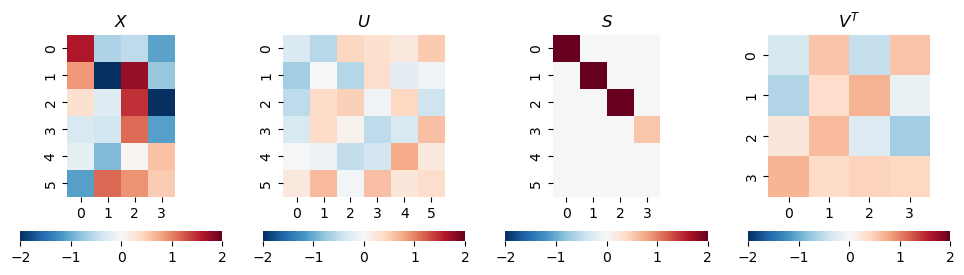

In [6]:
fig, axs = plt.subplots(1, 4, figsize=(12, 3))  # 创建1行4列的子图

plt.sca(axs[0])  # 设置当前子图为第一个子图
ax = sns.heatmap(X, cmap='RdBu_r', vmax=all_max, vmin=all_min, cbar_kws={"orientation": "horizontal"})  # 绘制X的热力图
ax.set_aspect("equal")  # 设置子图的宽高比为相等
plt.title(r'$X$')  # 设置标题为X

plt.sca(axs[1])  # 设置当前子图为第二个子图
ax = sns.heatmap(U, cmap='RdBu_r', vmax=all_max, vmin=all_min, cbar_kws={"orientation": "horizontal"})  # 绘制U的热力图
ax.set_aspect("equal")
plt.title(r'$U$')

plt.sca(axs[2])  # 设置当前子图为第三个子图
ax = sns.heatmap(S, cmap='RdBu_r', vmax=all_max, vmin=all_min, cbar_kws={"orientation": "horizontal"})  # 绘制S的热力图
ax.set_aspect("equal")
plt.title(r'$S$')

plt.sca(axs[3])  # 设置当前子图为第四个子图
ax = sns.heatmap(V.T, cmap='RdBu_r', vmax=all_max, vmin=all_min, cbar_kws={"orientation": "horizontal"})  # 绘制V^T的热力图
ax.set_aspect("equal")
plt.title(r'$V^T$')

## 计算紧致形式（Economy-size, thin）下的SVD分解

In [7]:
U, S, V = svd(X, full_matrices=False)  # 对X进行紧致形式的SVD分解

## 可视化紧致形式的SVD分解结果

Text(0.5, 1.0, '$V^T$')

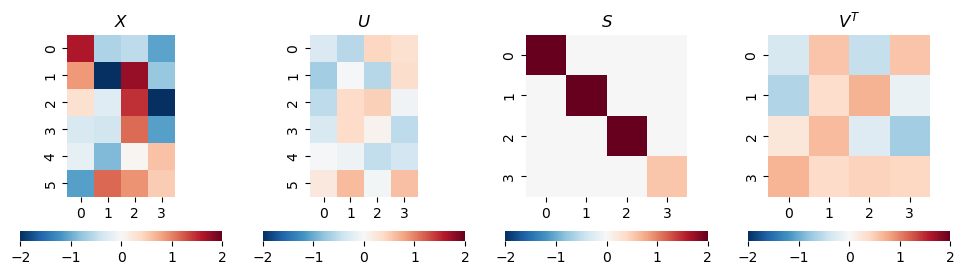

In [8]:
fig, axs = plt.subplots(1, 4, figsize=(12, 3))  # 创建1行4列的子图

plt.sca(axs[0])  # 设置当前子图为第一个子图
ax = sns.heatmap(X, cmap='RdBu_r', vmax=all_max, vmin=all_min, cbar_kws={"orientation": "horizontal"})  # 绘制X的热力图
ax.set_aspect("equal")  # 设置子图的宽高比为相等
plt.title(r'$X$')  # 设置标题为X

plt.sca(axs[1])  # 设置当前子图为第二个子图
ax = sns.heatmap(U, cmap='RdBu_r', vmax=all_max, vmin=all_min, cbar_kws={"orientation": "horizontal"})  # 绘制U的热力图
ax.set_aspect("equal")
plt.title(r'$U$')

plt.sca(axs[2])  # 设置当前子图为第三个子图
ax = sns.heatmap(S, cmap='RdBu_r', vmax=all_max, vmin=all_min, cbar_kws={"orientation": "horizontal"})  # 绘制S的热力图
ax.set_aspect("equal")
plt.title(r'$S$')

plt.sca(axs[3])  # 设置当前子图为第四个子图
ax = sns.heatmap(V.T, cmap='RdBu_r', vmax=all_max, vmin=all_min, cbar_kws={"orientation": "horizontal"})  # 绘制V^T的热力图
ax.set_aspect("equal")
plt.title(r'$V^T$')

## 压缩形式SVD分解

In [9]:
import copy  # 导入copy模块，用于深度复制矩阵
X_rank_3 = copy.deepcopy(X)  # 深度复制矩阵X
X_rank_3[:, 3] = X[:, 0] + X[:, 1]  # 调整X的第4列，使其等于第1列与第2列之和，降秩至3

In [10]:
U_rank_3, S_rank_3, V_rank_3 = svd(X_rank_3, full_matrices=False)  # 对压缩形式的X进行SVD分解

## 可视化压缩形式的SVD分解结果

Text(0.5, 1.0, '$V^T$')

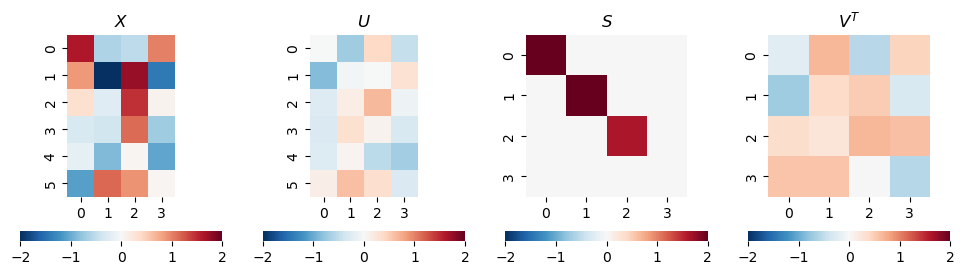

In [11]:
fig, axs = plt.subplots(1, 4, figsize=(12, 3))  # 创建1行4列的子图

plt.sca(axs[0])  # 设置当前子图为第一个子图
ax = sns.heatmap(X_rank_3, cmap='RdBu_r', vmax=all_max, vmin=all_min, cbar_kws={"orientation": "horizontal"})  # 绘制压缩后的X的热力图
ax.set_aspect("equal")
plt.title(r'$X$')

plt.sca(axs[1])  # 设置当前子图为第二个子图
ax = sns.heatmap(U_rank_3, cmap='RdBu_r', vmax=all_max, vmin=all_min, cbar_kws={"orientation": "horizontal"})  # 绘制U的热力图
ax.set_aspect("equal")
plt.title(r'$U$')

plt.sca(axs[2])  # 设置当前子图为第三个子图
ax = sns.heatmap(S_rank_3, cmap='RdBu_r', vmax=all_max, vmin=all_min, cbar_kws={"orientation": "horizontal"})  # 绘制S的热力图
ax.set_aspect("equal")
plt.title(r'$S$')

plt.sca(axs[3])  # 设置当前子图为第四个子图
ax = sns.heatmap(V_rank_3.T, cmap='RdBu_r', vmax=all_max, vmin=all_min, cbar_kws={"orientation": "horizontal"})  # 绘制V^T的热力图
ax.set_aspect("equal")
plt.title(r'$V^T$')

## 截断形式的SVD分解

In [12]:
num_p = 2  # 设置截断的奇异值数量

In [13]:
U_truc = U[:, 0:num_p]  # 选取前num_p列的U矩阵
S_truc = S[0:num_p, 0:num_p]  # 选取前num_p行和列的S矩阵
V_truc = V[:, 0:num_p]  # 选取前num_p列的V矩阵

X_hat = U_truc @ S_truc @ (V_truc.T)  # 计算重构的矩阵X_hat

## 可视化重构矩阵及其SVD分解结果

Text(0.5, 1.0, '$V^T$')

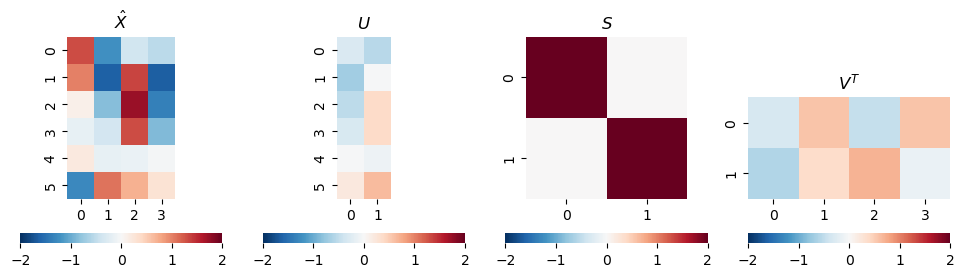

In [14]:
fig, axs = plt.subplots(1, 4, figsize=(12, 3))  # 创建1行4列的子图

plt.sca(axs[0])  # 设置当前子图为第一个子图
ax = sns.heatmap(X_hat, cmap='RdBu_r', vmax=all_max, vmin=all_min, cbar_kws={"orientation": "horizontal"})  # 绘制重构矩阵的热力图
ax.set_aspect("equal")
plt.title(r'$\hat{X}$')  # 设置标题为重构矩阵

plt.sca(axs[1])  # 设置当前子图为第二个子图
ax = sns.heatmap(U_truc, cmap='RdBu_r', vmax=all_max, vmin=all_min, cbar_kws={"orientation": "horizontal"})  # 绘制截断的U矩阵
ax.set_aspect("equal")
plt.title(r'$U$')

plt.sca(axs[2])  # 设置当前子图为第三个子图
ax = sns.heatmap(S_truc, cmap='RdBu_r', vmax=all_max, vmin=all_min, cbar_kws={"orientation": "horizontal"})  # 绘制截断的S矩阵
ax.set_aspect("equal")
plt.title(r'$S$')

plt.sca(axs[3])  # 设置当前子图为第四个子图
ax = sns.heatmap(V_truc.T, cmap='RdBu_r', vmax=all_max, vmin=all_min, cbar_kws={"orientation": "horizontal"})  # 绘制截断的V^T矩阵
ax.set_aspect("equal")
plt.title('$V^T$')

## 可视化重构误差

Text(0.5, 1.0, '$E_e = X - \\hat{X}$')

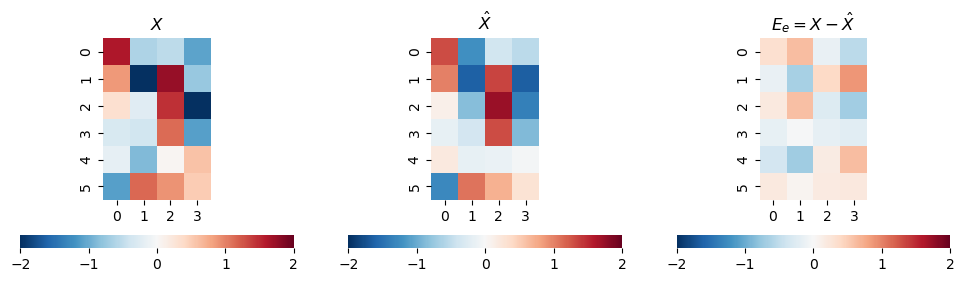

In [15]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))  # 创建1行3列的子图

plt.sca(axs[0])  # 设置当前子图为第一个子图
ax = sns.heatmap(X, cmap='RdBu_r', vmax=all_max, vmin=all_min, cbar_kws={"orientation": "horizontal"})  # 绘制原始矩阵的热力图
ax.set_aspect("equal")
plt.title(r'$X$')

plt.sca(axs[1])  # 设置当前子图为第二个子图
ax = sns.heatmap(X_hat, cmap='RdBu_r', vmax=all_max, vmin=all_min, cbar_kws={"orientation": "horizontal"})  # 绘制重构矩阵的热力图
ax.set_aspect("equal")
plt.title(r'$\hat{X}$')

plt.sca(axs[2])  # 设置当前子图为第三个子图
ax = sns.heatmap(X - X_hat, cmap='RdBu_r', vmax=all_max, vmin=all_min, cbar_kws={"orientation": "horizontal"})  # 绘制重构误差矩阵的热力图
ax.set_aspect("equal")
plt.title(r'$E_e = X - \hat{X}$')  # 设置标题为误差矩阵

## 计算奇异值的张量积

In [16]:
u1_outer_v1 = np.outer(U[:, 0][:, None], V[:, 0][:, None])  # 计算第1个奇异值的外积
u2_outer_v2 = np.outer(U[:, 1][:, None], V[:, 1][:, None])  # 计算第2个奇异值的外积
u3_outer_v3 = np.outer(U[:, 2][:, None], V[:, 2][:, None])  # 计算第3个奇异值的外积
u4_outer_v4 = np.outer(U[:, 3][:, None], V[:, 3][:, None])  # 计算第4个奇异值的外积

## 可视化奇异值的张量积

Text(0.5, 1.0, '$u_4 v_4^T$')

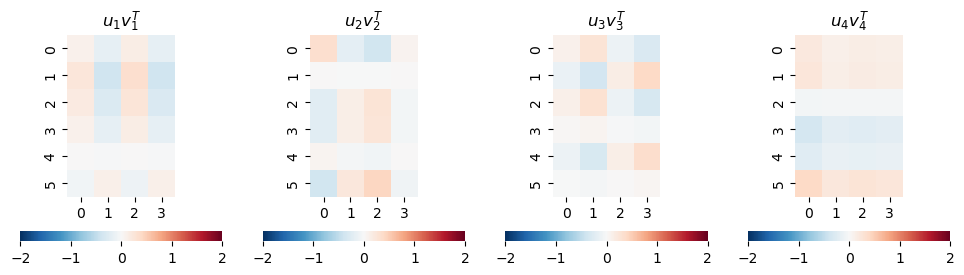

In [17]:
fig, axs = plt.subplots(1, 4, figsize=(12, 3))  # 创建1行4列的子图

plt.sca(axs[0])  # 设置当前子图为第一个子图
ax = sns.heatmap(u1_outer_v1, cmap='RdBu_r', vmax=all_max, vmin=all_min, cbar_kws={"orientation": "horizontal"})  # 绘制u1与v1的外积
ax.set_aspect("equal")
plt.title(r'$u_1 v_1^T$')  # 设置标题

plt.sca(axs[1])  # 设置当前子图为第二个子图
ax = sns.heatmap(u2_outer_v2, cmap='RdBu_r', vmax=all_max, vmin=all_min, cbar_kws={"orientation": "horizontal"})  # 绘制u2与v2的外积
ax.set_aspect("equal")
plt.title(r'$u_2 v_2^T$')

plt.sca(axs[2])  # 设置当前子图为第三个子图
ax = sns.heatmap(u3_outer_v3, cmap='RdBu_r', vmax=all_max, vmin=all_min, cbar_kws={"orientation": "horizontal"})  # 绘制u3与v3的外积
ax.set_aspect("equal")
plt.title(r'$u_3 v_3^T$')

plt.sca(axs[3])  # 设置当前子图为第四个子图
ax = sns.heatmap(u4_outer_v4, cmap='RdBu_r', vmax=all_max, vmin=all_min, cbar_kws={"orientation": "horizontal"})  # 绘制u4与v4的外积
ax.set_aspect("equal")
plt.title(r'$u_4 v_4^T$')

## 可视化各部分重构

In [18]:
X_1 = S[0, 0] * u1_outer_v1  # 第1个重构分量
X_2 = S[1, 1] * u2_outer_v2  # 第2个重构分量
X_3 = S[2, 2] * u3_outer_v3  # 第3个重构分量
X_4 = S[3, 3] * u4_outer_v4  # 第4个重构分量

Text(0.5, 1.0, '$\\hat{X}_4$')

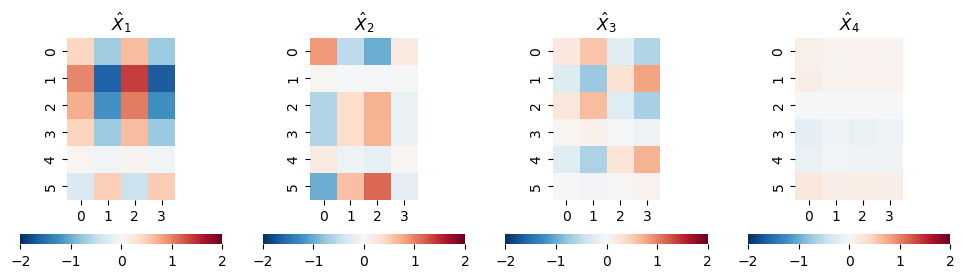

In [19]:
fig, axs = plt.subplots(1, 4, figsize=(12, 3))  # 创建1行4列的子图

plt.sca(axs[0])  # 设置当前子图为第一个子图
ax = sns.heatmap(X_1, cmap='RdBu_r', vmax=all_max, vmin=all_min, cbar_kws={"orientation": "horizontal"})  # 绘制第1个重构分量
ax.set_aspect("equal")
plt.title(r'$\hat{X}_1$')  # 设置标题

plt.sca(axs[1])  # 设置当前子图为第二个子图
ax = sns.heatmap(X_2, cmap='RdBu_r', vmax=all_max, vmin=all_min, cbar_kws={"orientation": "horizontal"})  # 绘制第2个重构分量
ax.set_aspect("equal")
plt.title(r'$\hat{X}_2$')

plt.sca(axs[2])  # 设置当前子图为第三个子图
ax = sns.heatmap(X_3, cmap='RdBu_r', vmax=all_max, vmin=all_min, cbar_kws={"orientation": "horizontal"})  # 绘制第3个重构分量
ax.set_aspect("equal")
plt.title(r'$\hat{X}_3$')

plt.sca(axs[3])  # 设置当前子图为第四个子图
ax = sns.heatmap(X_4, cmap='RdBu_r', vmax=all_max, vmin=all_min, cbar_kws={"orientation": "horizontal"})  # 绘制第4个重构分量
ax.set_aspect("equal")
plt.title(r'$\hat{X}_4$')

## 重构与误差可视化

Text(0.5, 1.0, '$X - (\\hat{X}_1 + \\hat{X}_2)$')

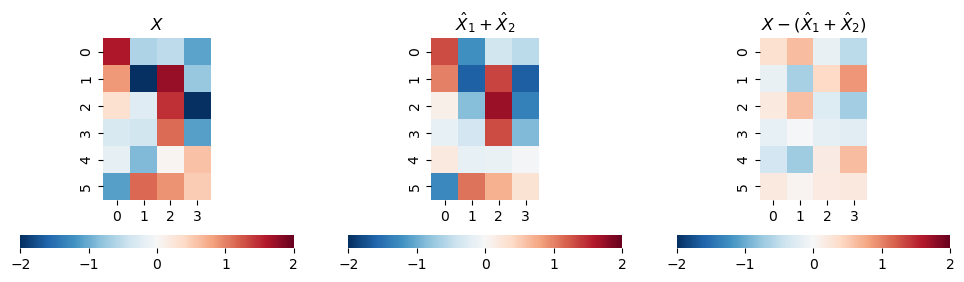

In [20]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))  # 创建1行3列的子图

plt.sca(axs[0])  # 设置当前子图为第一个子图
ax = sns.heatmap(X, cmap='RdBu_r', vmax=all_max, vmin=all_min, cbar_kws={"orientation": "horizontal"})  # 绘制原始矩阵的热力图
ax.set_aspect("equal")
plt.title(r'$X$')  # 设置标题为原始矩阵

plt.sca(axs[1])  # 设置当前子图为第二个子图
ax = sns.heatmap(X_1 + X_2, cmap='RdBu_r', vmax=all_max, vmin=all_min, cbar_kws={"orientation": "horizontal"})  # 绘制前两个重构分量的和
ax.set_aspect("equal")
plt.title(r'$\hat{X}_1 + \hat{X}_2$')  # 设置标题

plt.sca(axs[2])  # 设置当前子图为第三个子图
ax = sns.heatmap(X - (X_1 + X_2), cmap='RdBu_r', vmax=all_max, vmin=all_min, cbar_kws={"orientation": "horizontal"})  # 绘制重构误差矩阵
ax.set_aspect("equal")
plt.title(r'$X - (\hat{X}_1 + \hat{X}_2)$')  # 设置标题为误差矩阵

## 重新创建图表，绘制更多重构与误差

Text(0.5, 1.0, '$X - (\\hat{X}_1 + \\hat{X}_2 + \\hat{X}_3)$')

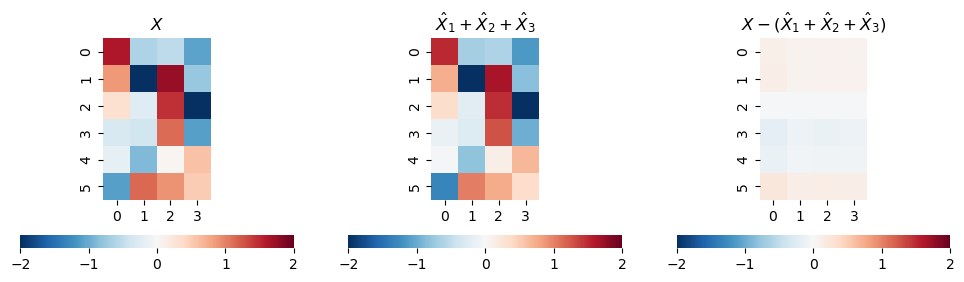

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))  # 创建1行3列的子图

plt.sca(axs[0])  # 设置当前子图为第一个子图
ax = sns.heatmap(X, cmap='RdBu_r', vmax=all_max, vmin=all_min, cbar_kws={"orientation": "horizontal"})  # 绘制原始矩阵的热力图
ax.set_aspect("equal")
plt.title(r'$X$')  # 设置标题为原始矩阵

plt.sca(axs[1])  # 设置当前子图为第二个子图
ax = sns.heatmap(X_1 + X_2 + X_3, cmap='RdBu_r', vmax=all_max, vmin=all_min, cbar_kws={"orientation": "horizontal"})  # 绘制前3个重构分量的和
ax.set_aspect("equal")
plt.title(r'$\hat{X}_1 + \hat{X}_2 + \hat{X}_3$')  # 设置标题

plt.sca(axs[2])  # 设置当前子图为第三个子图
ax = sns.heatmap(X - (X_1 + X_2 + X_3), cmap='RdBu_r', vmax=all_max, vmin=all_min, cbar_kws={"orientation": "horizontal"})  # 绘制重构误差矩阵
ax.set_aspect("equal")
plt.title(r'$X - (\hat{X}_1 + \hat{X}_2 + \hat{X}_3)$')  # 设置标题为误差矩阵

## 整体重构与误差分析

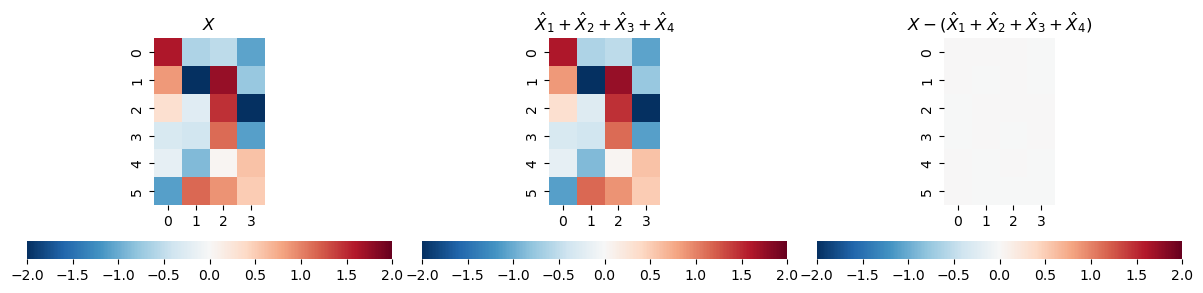

In [22]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))  # 创建1行3列的子图

plt.sca(axs[0])  # 设置当前子图为第一个子图
ax = sns.heatmap(X, cmap='RdBu_r', vmax=all_max, vmin=all_min, cbar_kws={"orientation": "horizontal"})  # 绘制原始矩阵的热力图
ax.set_aspect("equal")
plt.title(r'$X$')  # 设置标题为原始矩阵

plt.sca(axs[1])  # 设置当前子图为第二个子图
ax = sns.heatmap(X_1 + X_2 + X_3 + X_4, cmap='RdBu_r', vmax=all_max, vmin=all_min, cbar_kws={"orientation": "horizontal"})  # 绘制前4个重构分量的和
ax.set_aspect("equal")
plt.title(r'$\hat{X}_1 + \hat{X}_2 + \hat{X}_3 + \hat{X}_4$')  # 设置标题

plt.sca(axs[2])  # 设置当前子图为第三个子图
ax = sns.heatmap(X - (X_1 + X_2 + X_3 + X_4), cmap='RdBu_r', vmax=all_max, vmin=all_min, cbar_kws={"orientation": "horizontal"})  # 绘制重构误差矩阵
ax.set_aspect("equal")
plt.title(r'$X - (\hat{X}_1 + \hat{X}_2 + \hat{X}_3 + \hat{X}_4)$')  # 设置标题为误差矩阵

# 结束代码
plt.tight_layout()  # 调整子图间距
plt.show()  # 显示所有图形